In [ ]:
# import library and load dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
import time

In [2]:
# load dataset
data_path = '../data/processed/data_cleaned_scaled.csv' 
data = pd.read_csv(data_path)

numerical_cols = ['Admission grade', 
                  'Unemployment rate', 
                  'Inflation rate', 
                  'GDP', 
                  'Application order',
                  'Age at enrollment',
                  'Previous qualification (grade)', 
                  'Curricular units 1st sem (credited)', 
                  'Curricular units 1st sem (enrolled)', 
                  'Curricular units 1st sem (evaluations)', 
                  'Curricular units 1st sem (approved)', 
                  'Curricular units 1st sem (grade)', 
                  'Curricular units 1st sem (without evaluations)',
                  'Curricular units 2nd sem (credited)', 
                  'Curricular units 2nd sem (enrolled)', 
                  'Curricular units 2nd sem (evaluations)', 
                  'Curricular units 2nd sem (approved)', 
                  'Curricular units 2nd sem (grade)', 
                  'Curricular units 2nd sem (without evaluations)']  
categorical_cols = [col for col in data.columns if col not in numerical_cols]

# set numerical and categorical features
data[numerical_cols] = data[numerical_cols].astype(float)
data[categorical_cols] = data[categorical_cols].astype("category")

# form features and target
X = data.drop(['Target'], axis=1)
y = data['Target']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. RFE

Num Features: 34, Accuracy: 0.876236
Num Features: 1, Accuracy: 0.836678
Num Features: 2, Accuracy: 0.778470
Num Features: 3, Accuracy: 0.803054
Num Features: 4, Accuracy: 0.813228
Num Features: 5, Accuracy: 0.820011
Num Features: 6, Accuracy: 0.833289
Num Features: 7, Accuracy: 0.836397
Num Features: 8, Accuracy: 0.864372
Num Features: 9, Accuracy: 0.871716
Num Features: 10, Accuracy: 0.872567
Num Features: 11, Accuracy: 0.873979
Num Features: 12, Accuracy: 0.874259
Num Features: 13, Accuracy: 0.875956
Num Features: 14, Accuracy: 0.872848
Num Features: 15, Accuracy: 0.875391
Num Features: 16, Accuracy: 0.873696
Num Features: 17, Accuracy: 0.874543
Num Features: 18, Accuracy: 0.875673
Num Features: 19, Accuracy: 0.874827
Num Features: 20, Accuracy: 0.877086
Num Features: 21, Accuracy: 0.877935
Num Features: 22, Accuracy: 0.876521
Num Features: 23, Accuracy: 0.877935
Num Features: 24, Accuracy: 0.873414
Num Features: 25, Accuracy: 0.877933
Num Features: 26, Accuracy: 0.879910
Num Featur

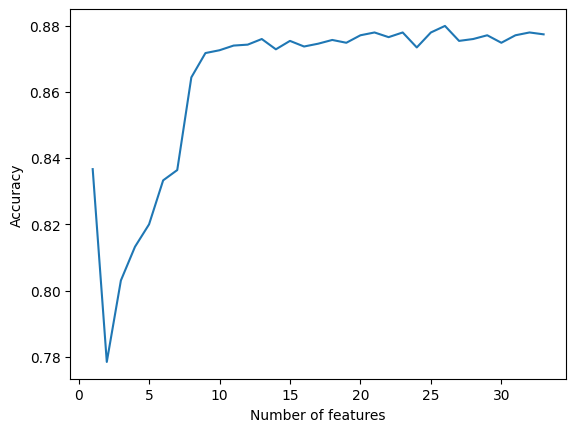

In [3]:
# loop through the # of features to select and plot the accuracy

# first calculate the accuracy for all features
model = RandomForestClassifier()
scores = cross_val_score(model, X_train, y_train, cv=10)
print("Num Features: %d, Accuracy: %f" % (X_train.shape[1], scores.mean()))

rfe_scores = []

for n in range(1, X.shape[1]):
    rfe = RFE(RandomForestClassifier(), n_features_to_select=n)
    rfe.fit(X_train, y_train)
    X_train_selected = X_train[X_train.columns[rfe.support_]]

    model = RandomForestClassifier()
    scores = cross_val_score(model, X_train_selected, y_train, cv=5)
    print("Num Features: %d, Accuracy: %f" % (n, scores.mean()))
    rfe_scores.append(scores.mean())

plt.plot(range(1, X_train.shape[1]), rfe_scores)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.savefig('../results/feature_accuracy.png')
plt.show()

In [22]:
# finally test the model on test set
n_features = 10
rfe = RFE(RandomForestClassifier(), n_features_to_select=n_features)
rfe.fit(X_train, y_train)
X_train_selected = X_train[X_train.columns[rfe.support_]]
X_test_selected = X_test[X_test.columns[rfe.support_]]

model = RandomForestClassifier()
model.fit(X_train_selected, y_train)
print(model.score(X_test_selected, y_test))


0.8395480225988701


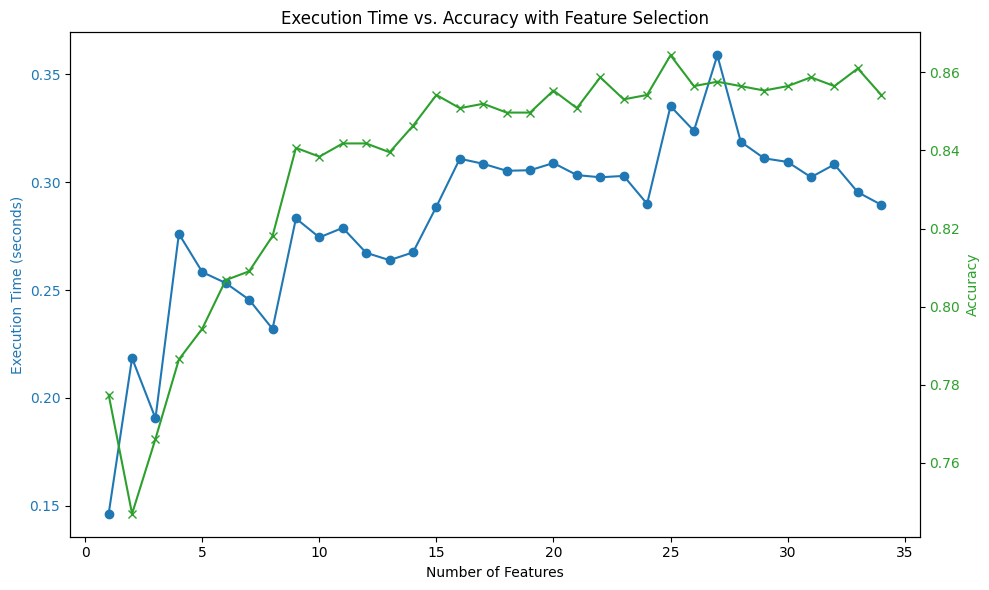

Features: 1, Time: 0.1464 sec, Accuracy: 0.7774
Features: 2, Time: 0.2185 sec, Accuracy: 0.7469
Features: 3, Time: 0.1906 sec, Accuracy: 0.7661
Features: 4, Time: 0.2760 sec, Accuracy: 0.7864
Features: 5, Time: 0.2583 sec, Accuracy: 0.7944
Features: 6, Time: 0.2533 sec, Accuracy: 0.8068
Features: 7, Time: 0.2455 sec, Accuracy: 0.8090
Features: 8, Time: 0.2320 sec, Accuracy: 0.8181
Features: 9, Time: 0.2832 sec, Accuracy: 0.8407
Features: 10, Time: 0.2744 sec, Accuracy: 0.8384
Features: 11, Time: 0.2788 sec, Accuracy: 0.8418
Features: 12, Time: 0.2672 sec, Accuracy: 0.8418
Features: 13, Time: 0.2638 sec, Accuracy: 0.8395
Features: 14, Time: 0.2674 sec, Accuracy: 0.8463
Features: 15, Time: 0.2886 sec, Accuracy: 0.8542
Features: 16, Time: 0.3108 sec, Accuracy: 0.8508
Features: 17, Time: 0.3085 sec, Accuracy: 0.8520
Features: 18, Time: 0.3052 sec, Accuracy: 0.8497
Features: 19, Time: 0.3055 sec, Accuracy: 0.8497
Features: 20, Time: 0.3088 sec, Accuracy: 0.8554
Features: 21, Time: 0.3033 se

In [23]:
# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Lists to store results
num_features_range = range(1, X.shape[1] + 1)
execution_times = []
accuracies = []

# Loop through different numbers of features
for n_features in num_features_range:
    # Initialize RFE with the current number of features
    rfe = RFE(model, n_features_to_select=n_features)
    
    # Fit the RFE model
    rfe.fit(X_train, y_train)
    
    # Transform the data to select the features
    X_train_selected = rfe.transform(X_train)
    X_test_selected = rfe.transform(X_test)
    
    # Measure the time for training with the selected features
    start_time = time.time()
    model.fit(X_train_selected, y_train)  # Fit on selected features
    end_time = time.time()
    
    # Store the execution time
    execution_times.append(end_time - start_time)
    
    # Measure accuracy on the test set
    accuracies.append(model.score(X_test_selected, y_test))

# Plotting the results (Execution Time vs. Number of Features)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting execution time on primary y-axis
ax1.set_xlabel('Number of Features')
ax1.set_ylabel('Execution Time (seconds)', color='tab:blue')
ax1.plot(num_features_range, execution_times, color='tab:blue', marker='o', label='Execution Time')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for accuracy
ax2 = ax1.twinx()  
ax2.set_ylabel('Accuracy', color='tab:green')
ax2.plot(num_features_range, accuracies, color='tab:green', marker='x', label='Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Title and grid
plt.title('Execution Time vs. Accuracy with Feature Selection')
fig.tight_layout()
plt.savefig('../results/feature_excution_accuracy.png')  
plt.show()

# Print the times and accuracies
for n_features, time_taken, accuracy in zip(num_features_range, execution_times, accuracies):
    print(f"Features: {n_features}, Time: {time_taken:.4f} sec, Accuracy: {accuracy:.4f}")


## 2. Mutual Information

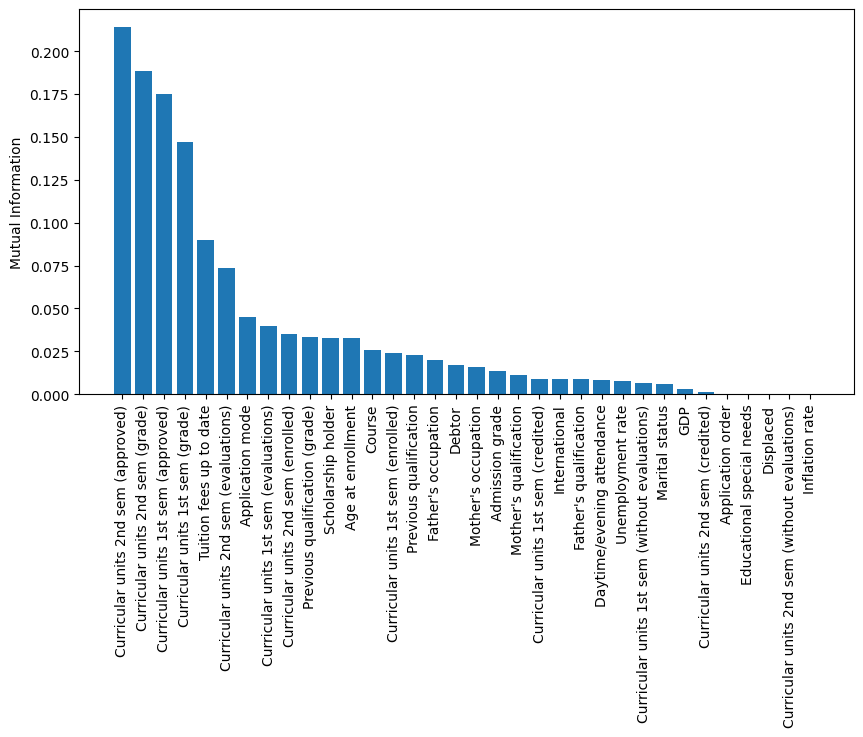

In [24]:
# feature selection using Mutual Information

# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train, random_state=0)

# sort the mutual information in non-ascending order
mutual_info = pd.Series(mutual_info, index=X_train.columns).sort_values(ascending=False)
# sort the columns in non-ascending order
X_train_sorted = X_train[mutual_info.index]

# plot the mutual information in non-ascending order

plt.figure(figsize=(10, 5))
plt.bar(X_train_sorted.columns, mutual_info)
plt.ylabel('Mutual Information')
plt.xticks(rotation=90)
plt.savefig('../results/feature_mutual_information.png', bbox_inches='tight')
plt.show()


Num Features: 1, Accuracy: 0.836678
Num Features: 2, Accuracy: 0.814356
Num Features: 3, Accuracy: 0.815204
Num Features: 4, Accuracy: 0.815770
Num Features: 5, Accuracy: 0.848828
Num Features: 6, Accuracy: 0.855325
Num Features: 7, Accuracy: 0.857023
Num Features: 8, Accuracy: 0.859848
Num Features: 9, Accuracy: 0.870587
Num Features: 10, Accuracy: 0.867198
Num Features: 11, Accuracy: 0.866633
Num Features: 12, Accuracy: 0.871435
Num Features: 13, Accuracy: 0.874825
Num Features: 14, Accuracy: 0.872282
Num Features: 15, Accuracy: 0.873131
Num Features: 16, Accuracy: 0.875391
Num Features: 17, Accuracy: 0.873415
Num Features: 18, Accuracy: 0.877654
Num Features: 19, Accuracy: 0.874825
Num Features: 20, Accuracy: 0.875391
Num Features: 21, Accuracy: 0.875108
Num Features: 22, Accuracy: 0.878214
Num Features: 23, Accuracy: 0.877652
Num Features: 24, Accuracy: 0.877087
Num Features: 25, Accuracy: 0.880761
Num Features: 26, Accuracy: 0.876238
Num Features: 27, Accuracy: 0.875109
Num Featur

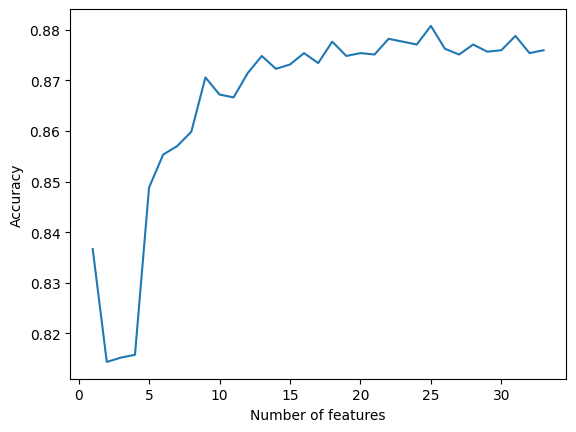

In [25]:
# check the accuracy with the top N features

mi_scores = []
for n in range(1, X.shape[1]):
    X_selected = X_train_sorted[X_train_sorted.columns[:n]]
    model = RandomForestClassifier()
    scores = cross_val_score(model, X_selected, y_train, cv=5)
    mi_scores.append(scores.mean())
    print("Num Features: %d, Accuracy: %f" % (n, scores.mean()))

plt.plot(range(1, X.shape[1]), mi_scores)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.show()


In [26]:
# test it on X_test
n_features = 9
X_train_selected = X_train_sorted[X_train_sorted.columns[:n_features]]
X_test_sorted = X_test[mutual_info.index]
X_test_selected = X_test_sorted[X_test_sorted.columns[:n_features]]
model = RandomForestClassifier()
model.fit(X_train_selected, y_train)
print(model.score(X_test_selected, y_test))

0.8440677966101695


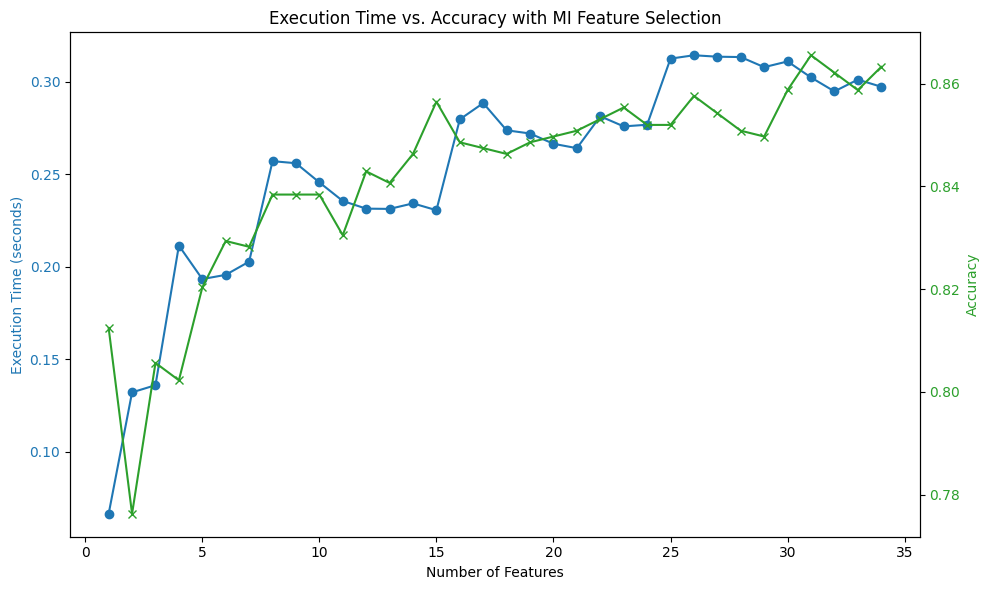

Features: 1, Time: 0.0666 sec, Accuracy: 0.8124
Features: 2, Time: 0.1322 sec, Accuracy: 0.7763
Features: 3, Time: 0.1361 sec, Accuracy: 0.8056
Features: 4, Time: 0.2115 sec, Accuracy: 0.8023
Features: 5, Time: 0.1934 sec, Accuracy: 0.8203
Features: 6, Time: 0.1957 sec, Accuracy: 0.8294
Features: 7, Time: 0.2028 sec, Accuracy: 0.8282
Features: 8, Time: 0.2571 sec, Accuracy: 0.8384
Features: 9, Time: 0.2560 sec, Accuracy: 0.8384
Features: 10, Time: 0.2457 sec, Accuracy: 0.8384
Features: 11, Time: 0.2356 sec, Accuracy: 0.8305
Features: 12, Time: 0.2315 sec, Accuracy: 0.8429
Features: 13, Time: 0.2313 sec, Accuracy: 0.8407
Features: 14, Time: 0.2343 sec, Accuracy: 0.8463
Features: 15, Time: 0.2306 sec, Accuracy: 0.8565
Features: 16, Time: 0.2797 sec, Accuracy: 0.8486
Features: 17, Time: 0.2885 sec, Accuracy: 0.8475
Features: 18, Time: 0.2738 sec, Accuracy: 0.8463
Features: 19, Time: 0.2721 sec, Accuracy: 0.8486
Features: 20, Time: 0.2665 sec, Accuracy: 0.8497
Features: 21, Time: 0.2642 se

In [ ]:
# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Calculate mutual information scores for each feature
mi_scores = mutual_info_classif(X_train, y_train)

# Sort the features based on their MI scores
sorted_indices = np.argsort(mi_scores)[::-1]  # Sorting in descending order

# Lists to store results
num_features_range = range(1, X.shape[1] + 1)  # From 1 to X.shape[1] - 1
execution_times = []
accuracies = []

# Loop through different numbers of features (based on MI scores)
for n_features in num_features_range:
    # Select the top n_features based on MI scores
    selected_features = sorted_indices[:n_features]
    X_train_selected = X_train.iloc[:, selected_features]  
    X_test_selected = X_test.iloc[:, selected_features]  

    
    # Measure the time for training with the selected features
    start_time = time.time()
    model.fit(X_train_selected, y_train)  # Fit on selected features
    end_time = time.time()
    
    # Store the execution time
    execution_times.append(end_time - start_time)
    
    # Optionally, measure accuracy on the test set
    accuracies.append(model.score(X_test_selected, y_test))




In [ ]:
# Plotting the results (Execution Time vs. Number of Features)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting execution time on primary y-axis
ax1.set_xlabel('Number of Features')
ax1.set_ylabel('Execution Time (seconds)', color='tab:blue')
ax1.plot(num_features_range, execution_times, color='tab:blue', marker='o', label='Execution Time')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for accuracy
ax2 = ax1.twinx()  
ax2.set_ylabel('Accuracy', color='tab:green')
ax2.plot(num_features_range, accuracies, color='tab:green', marker='x', label='Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Title and grid
plt.title('Execution Time vs. Accuracy with MI Feature Selection')
fig.tight_layout()  
plt.savefig('../results/feature_excution_accuracy_mi.png')
plt.show()

# Print the times and accuracies
for n_features, time_taken, accuracy in zip(num_features_range, execution_times, accuracies):
    print(f"Features: {n_features}, Time: {time_taken:.4f} sec, Accuracy: {accuracy:.4f}")

## 3. Export new dataset after feature selection